# Explore here

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [13]:
# Read
df = pd.read_csv('../data/raw/housing.csv', sep=',')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [34]:
df.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool>

In [15]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
# Filtrar las columnas necesarias
df = df[['Latitude', 'Longitude', 'MedInc']]

# Dividir en train y test (80% train, 20% test)
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [26]:
# Aplicar K-Means con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
train['cluster'] = kmeans.fit_predict(train[['Latitude', 'Longitude', 'MedInc']])

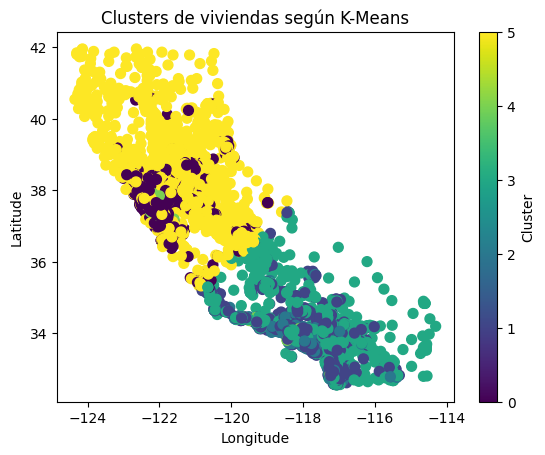

In [27]:
# Distribucion de clusters
plt.scatter(train['Longitude'], train['Latitude'], c=train['cluster'], cmap='viridis', s=50)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters de viviendas según K-Means")
plt.colorbar(label="Cluster")
plt.show()

Cada punto representa una ubicación geográfica (con valores de longitud y latitud), y los colores indican a qué cluster pertenece cada vivienda.

In [28]:
# Aplicar K-Means en el conjunto de test
test['cluster'] = kmeans.predict(test[['Latitude', 'Longitude', 'MedInc']])

# Verificar si la columna se agregó correctamente
print(test.columns)

Index(['Latitude', 'Longitude', 'MedInc', 'cluster'], dtype='object')


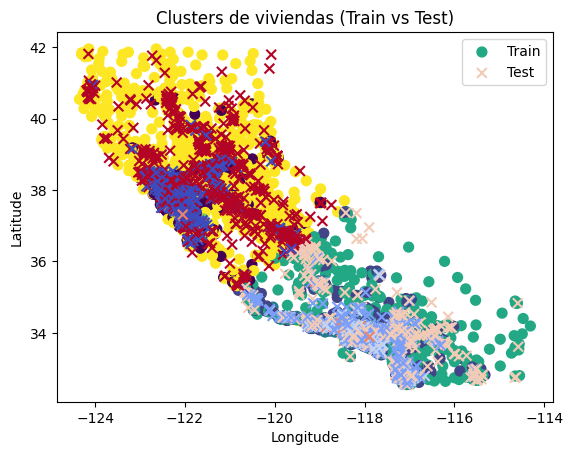

In [29]:
plt.scatter(train['Longitude'], train['Latitude'], c=train['cluster'], cmap='viridis', s=50, label="Train")
plt.scatter(test['Longitude'], test['Latitude'], c=test['cluster'], cmap='coolwarm', s=50, marker="x", label="Test")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters de viviendas (Train vs Test)")
plt.legend()
plt.show()

In [ ]:
# Separar características y etiquetas
X_train, y_train = train[['Latitude', 'Longitude', 'MedInc']], train['cluster']
X_test, y_test = test[['Latitude', 'Longitude', 'MedInc']], test['cluster']

# Entrenar modelo supervisado
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Precisión del modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo supervisado: {accuracy:.2f}")

Precisión del modelo supervisado: 1.00
